<a href="https://colab.research.google.com/github/PacktPublishing/Machine-Learning-for-Time-Series-with-Python/blob/master/chapter3/Preprocessing.ipynb" target="_parent\"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U tsfresh workalendar astral "featuretools[tsfresh]" sktime

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
  Using cached workalendar-17.0.0-py3-none-any.whl.metadata (8.4 kB)
  Using cached astral-3.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached sktime-0.37.0-py3-none-any.whl.metadata (34 kB)
  Using cached featuretools-1.31.0-py3-none-any.whl.metadata (15 kB)
  Using cached lunardate-0.2.2-py3-none-any.whl.metadata (3.6 kB)
  Using cached pyluach-2.2.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached holidays-0.72-py3-none-any.whl.metadata (37 kB)
  Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached woodwork-0.31.0-py3-none-any.whl.metadata (10 kB)
  Using cached featuretools_tsfresh_primitives-1.0.2-py3-none-any.whl.metadata (4.5 kB)
  Using cached scikit_base-0.12.2-py3-none-any.whl.metadata (8.8 kB)
INFO: pip is looking at multiple versions of featuretools-tsfresh-primitives to determine which version is compatible with other requirements. Th

In [2]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Transformations

In [3]:
import numpy as np

np.random.seed(0)
pts = 10000
vals = np.random.lognormal(0, 1.0, pts)

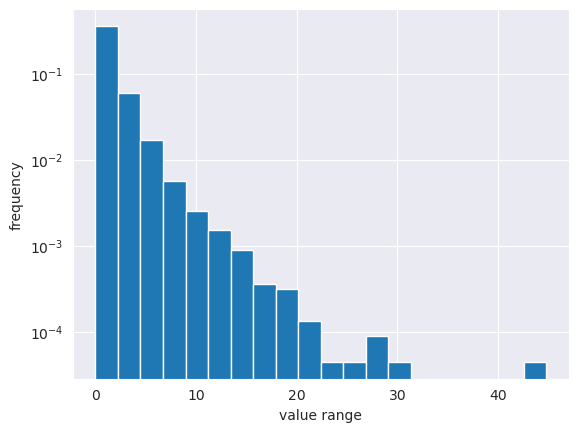

In [4]:
plt.hist(vals, bins=20, density=True)
plt.yscale("log")
plt.ylabel("frequency")
plt.xlabel("value range");

In [5]:
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from scipy.stats import normaltest

vals_mm = minmax_scale(vals)
scaler = StandardScaler()
vals_ss = scaler.fit_transform(vals.reshape(-1, 1))
_, p = normaltest(vals_ss.squeeze())
print(f"significance: {p:.2f}")

significance: 0.00


In [6]:
_, p = normaltest(vals_mm.squeeze())
print(f"significance: {p:.2f}")

significance: 0.00


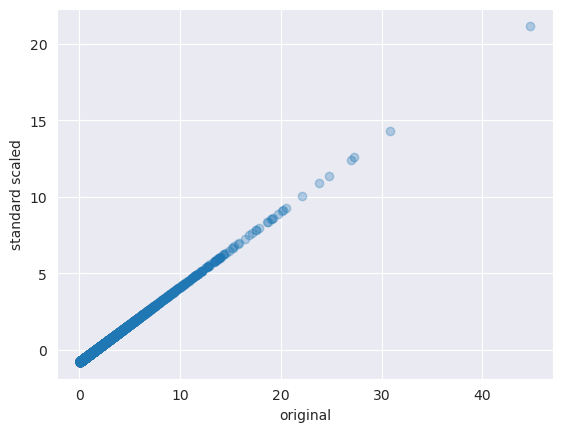

In [7]:
plt.scatter(vals, vals_ss, alpha=0.3)
plt.ylabel("standard scaled")
plt.xlabel("original");

In [8]:
from statsmodels.stats.diagnostic import kstest_normal

log_transformed = np.log(vals)
_, p = kstest_normal(log_transformed)  # stats.normaltest
print(f"significance: {p:.2f}")

significance: 0.31


In [9]:
np.std(log_transformed)

0.9875565681761207

In [10]:
np.mean(log_transformed)

-0.01843372015826582

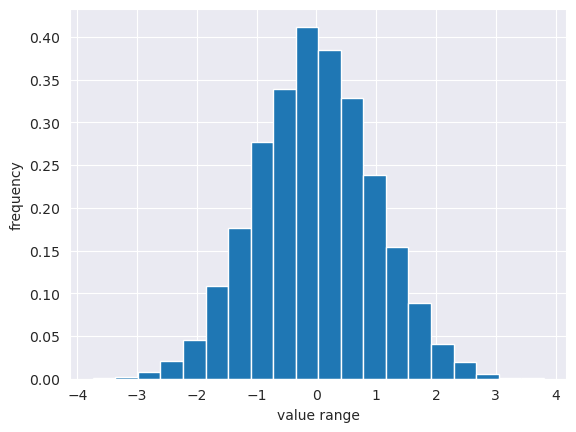

In [11]:
plt.hist(log_transformed, bins=20, density=True)
#plt.yscale("log")
plt.ylabel("frequency")
plt.xlabel("value range");

In [12]:
from scipy.stats import boxcox
vals_bc = boxcox(vals, 0.0)
_, p = normaltest(vals_bc)
print(f"significance: {p:.2f}")

significance: 0.46


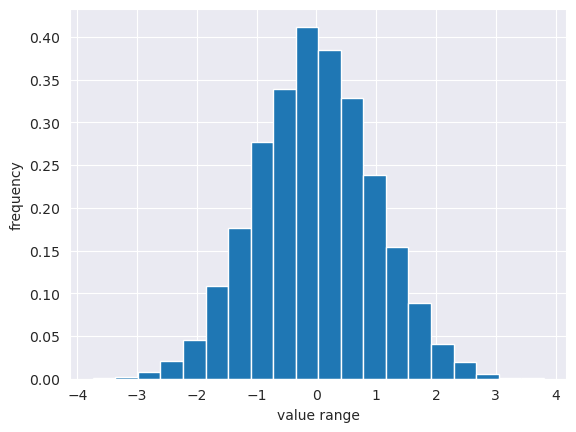

In [13]:
plt.hist(vals_bc, bins=20, density=True)
plt.ylabel("frequency")
plt.xlabel("value range");

# Imputation

In [14]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])
SimpleImputer()
df = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
print(imp_mean.transform(df))


[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


# Derived Date Features

## Holidays

In [17]:
from workalendar.europe.united_kingdom import UnitedKingdom
UnitedKingdom().holidays()

[(datetime.date(2025, 1, 1), 'New year'),
 (datetime.date(2025, 4, 18), 'Good Friday'),
 (datetime.date(2025, 4, 20), 'Easter Sunday'),
 (datetime.date(2025, 4, 21), 'Easter Monday'),
 (datetime.date(2025, 5, 5), 'Early May Bank Holiday'),
 (datetime.date(2025, 5, 26), 'Spring Bank Holiday'),
 (datetime.date(2025, 8, 25), 'Late Summer Bank Holiday'),
 (datetime.date(2025, 12, 25), 'Christmas Day'),
 (datetime.date(2025, 12, 26), 'Boxing Day')]

In [18]:
from typing import List
from dateutil.relativedelta import relativedelta, TH
import datetime
from workalendar.usa import California

def create_custom_holidays(year) -> List:
      custom_holidays = California().holidays()
      custom_holidays.append((
        (datetime.datetime(year, 11, 1) + relativedelta(weekday=TH(+4)) + datetime.timedelta(days=1)).date(),
        "Black Friday"
      ))
      return {k: v for (k, v) in custom_holidays}

custom_holidays = create_custom_holidays(2021)

In [19]:
custom_holidays

{datetime.date(2025, 1, 1): 'New year',
 datetime.date(2025, 1, 20): 'Birthday of Martin Luther King, Jr.',
 datetime.date(2025, 2, 17): "Washington's Birthday",
 datetime.date(2025, 3, 31): 'Cesar Chavez Day',
 datetime.date(2025, 5, 26): 'Memorial Day',
 datetime.date(2025, 7, 4): 'Independence Day',
 datetime.date(2025, 9, 1): 'Labor Day',
 datetime.date(2025, 11, 11): 'Veterans Day',
 datetime.date(2025, 11, 27): 'Thanksgiving Day',
 datetime.date(2025, 11, 28): 'Thanksgiving Friday',
 datetime.date(2025, 12, 25): 'Christmas Day',
 datetime.date(2021, 11, 26): 'Black Friday'}

In [20]:
def is_holiday(current_date: datetime.date):
    """Determine if we have a holiday."""
    return custom_holidays.get(current_date, False)

today = datetime.date(2021, 4, 11)
is_holiday(today)

False

## Date Annotations

In [21]:
import calendar

calendar.monthrange(2021, 1)

(calendar.FRIDAY, 31)

In [22]:
from datetime import date
def year_anchor(current_date: datetime.date):
      return (
        (current_date - date(current_date.year, 1, 1)).days,
        (date(current_date.year, 12, 31) - current_date).days,
      )

year_anchor(today)


(100, 264)

In [23]:
def month_anchor(current_date: datetime.date):
      last_day = calendar.monthrange(current_date.year, current_date.month)[0]
    
      return (
        (current_date - datetime.date(current_date.year, current_date.month, 1)).days,
        (current_date - datetime.date(current_date.year, current_date.month, last_day)).days,
      )

month_anchor(today)


(10, 8)

## Paydays

In [24]:
def get_last_friday(current_date: datetime.date, weekday=calendar.FRIDAY):
      return max(week[weekday]
        for week in calendar.monthcalendar(
            current_date.year, current_date.month
        ))

get_last_friday(today)


30

## Seasons

In [25]:
YEAR = 2021
seasons = [
    ('winter', (date(YEAR,  1,  1),  date(YEAR,  3, 20))),
    ('spring', (date(YEAR,  3, 21),  date(YEAR,  6, 20))),
    ('summer', (date(YEAR,  6, 21),  date(YEAR,  9, 22))),
    ('autumn', (date(YEAR,  9, 23),  date(YEAR, 12, 20))),
    ('winter', (date(YEAR, 12, 21),  date(YEAR, 12, 31)))
]

def is_in_interval(current_date: datetime.date, seasons):
      return next(season for season, (start, end) in seasons
                if start <= current_date.replace(year=YEAR) <= end)
    
is_in_interval(today, seasons)


'spring'

## Sun and Moon

In [26]:
!pip install astral

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
  Using cached astral-3.2-py3-none-any.whl.metadata (1.7 kB)


In [27]:
from astral.sun import sun
from astral import LocationInfo
CITY = LocationInfo("London", "England", "Europe/London", 51.5, -0.116)
def get_sunrise_dusk(current_date: datetime.date, city_name='London'):
      s = sun(CITY.observer, date=current_date)
      sunrise = s['sunrise']
      dusk = s['dusk']
      return (sunrise - dusk).seconds / 3600

get_sunrise_dusk(today)


9.788055555555555

## Business Days

In [28]:
def get_business_days(current_date: datetime.date):
      last_day = calendar.monthrange(current_date.year, current_date.month)[1]
      rng = pd.date_range(current_date.replace(day=1), periods=last_day, freq='D')
      business_days = pd.bdate_range(rng[0], rng[-1])
      return len(business_days), last_day - len(business_days)

get_business_days(date.today())


(22, 9)

# Automated Feature Extraction

In [36]:
import featuretools as ft
from featuretools.primitives import Minute, Hour, Day, Month, Year, Weekday

data = pd.DataFrame(
    {'Time': ['2014-01-01 01:41:50',
              '2014-01-01 02:06:50',
              '2014-01-01 02:31:50',
              '2014-01-01 02:56:50',
              '2014-01-01 03:21:50'],
     'Target': [0, 0, 0, 0, 1]}
)        
data['index'] = data.index
es = ft.EntitySet('My EntitySet')



es.add_dataframe(
    dataframe_name='main_data_table',  # Remplacé entity_id par dataframe_name
    index='index',
    dataframe=data,
    time_index='Time'
)
fm, features = ft.dfs(
    entityset=es,
    target_dataframe_name='main_data_table',  # Remplacé target_entity par target_dataframe_name
    trans_primitives=[Minute, Hour, Day, Month, Year, Weekday]
)




/root/miniconda3/envs/TimeSeries/lib/python3.12/site-packages/featuretools/synthesis/deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


In [ ]:
fm

In [37]:
from tsfresh.feature_extraction import extract_features
from tsfresh.feature_extraction import ComprehensiveFCParameters

settings = ComprehensiveFCParameters()
extract_features(data, column_id='Time', default_fc_parameters=settings)


Feature Extraction: 100%|██████████| 10/10 [00:00<00:00, 298.03it/s]


AttributeError: 'Index' object has no attribute '_format_flat'

                     Target__variance_larger_than_standard_deviation  \
2014-01-01 01:41:50                                              0.0   
2014-01-01 02:06:50                                              0.0   
2014-01-01 02:31:50                                              0.0   
2014-01-01 02:56:50                                              0.0   
2014-01-01 03:21:50                                              0.0   

                     Target__has_duplicate_max  Target__has_duplicate_min  \
2014-01-01 01:41:50                        0.0                        0.0   
2014-01-01 02:06:50                        0.0                        0.0   
2014-01-01 02:31:50                        0.0                        0.0   
2014-01-01 02:56:50                        0.0                        0.0   
2014-01-01 03:21:50                        0.0                        0.0   

                     Target__has_duplicate  Target__sum_values  \
2014-01-01 01:41:50                   

## ROCKET

In [42]:
from sktime.datasets import load_arrow_head
# Utiliser le nouvel emplacement de la fonction from_nested_to_2d_array
from sktime.datatypes._panel._convert import from_nested_to_2d_array

X_train, y_train = load_arrow_head(split="train", return_X_y=True)

from_nested_to_2d_array(X_train).head()

AttributeError: 'Index' object has no attribute '_format_flat'

   dim_0__0  dim_0__1  dim_0__2  dim_0__3  dim_0__4  dim_0__5  dim_0__6  \
0 -1.963009 -1.957825 -1.956145 -1.938289 -1.896657 -1.869857 -1.838705   
1 -1.774571 -1.774036 -1.776586 -1.730749 -1.696268 -1.657377 -1.636227   
2 -1.866021 -1.841991 -1.835025 -1.811902 -1.764390 -1.707687 -1.648280   
3 -2.073758 -2.073301 -2.044607 -2.038346 -1.959043 -1.874494 -1.805619   
4 -1.746255 -1.741263 -1.722741 -1.698640 -1.677223 -1.630356 -1.579440   

   dim_0__7  dim_0__8  dim_0__9  ...  dim_0__241  dim_0__242  dim_0__243  \
0 -1.812289 -1.736433 -1.673329  ...   -1.583857   -1.655329   -1.719153   
1 -1.609807 -1.543439 -1.486174  ...   -1.471688   -1.484666   -1.539972   
2 -1.582643 -1.531502 -1.493609  ...   -1.584132   -1.652337   -1.684565   
3 -1.731043 -1.712653 -1.628022  ...   -1.678942   -1.743732   -1.819801   
4 -1.551225 -1.473980 -1.459377  ...   -1.547111   -1.607101   -1.635137   

   dim_0__244  dim_0__245  dim_0__246  dim_0__247  dim_0__248  dim_0__249  \
0   -1.750881  

In [43]:
from sktime.transformations.panel.rocket import Rocket
rocket = Rocket(num_kernels=1000)
rocket.fit(X_train)
X_train_transform = rocket.transform(X_train)


## Shapelets

In [56]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import pairwise_distances
import time

class SimpleShapeletTransform:
    def __init__(self, time_contract_in_mins=1, num_candidates_to_sample_per_case=10, verbose=0):
        self.time_contract_in_mins = time_contract_in_mins
        self.num_candidates_to_sample_per_case = num_candidates_to_sample_per_case
        self.verbose = verbose
        self.shapelets_ = None
        self.shapelet_lengths_ = None

    def _extract_shapelets(self, X, y):
        """Extrait des shapelets candidates à partir des séries temporelles."""
        # Gestion des données 2D ou 3D
        if len(X.shape) == 2:
            n_samples, series_length = X.shape
            n_series = 1
            # Restructurer X pour avoir la forme (n_samples, n_series, series_length)
            X_reshaped = np.array(X).reshape(n_samples, n_series, series_length)

        else:
            n_samples, n_series, series_length = X.shape
            X_reshaped = X

        shapelets = []
        shapelet_lengths = [int(series_length * 0.1), int(series_length * 0.3), int(series_length * 0.5)]

        # Temps maximum alloué pour l'extraction des shapelets
        start_time = time.time()
        max_time_in_seconds = self.time_contract_in_mins * 60

        # Pour chaque série temporelle, extraire des shapelets
        for i in range(min(n_samples, self.num_candidates_to_sample_per_case)):
            if time.time() - start_time > max_time_in_seconds:
                if self.verbose > 0:
                    print("Temps écoulé, arrêt de l'extraction des shapelets")
                break

            # Pour chaque longueur de shapelet possible
            for length in shapelet_lengths:
                if length < 3 or length >= series_length:
                    continue

                # Pour chaque position de départ possible dans la série
                for start_pos in range(series_length - length + 1):
                    if time.time() - start_time > max_time_in_seconds:
                        break

                    # Extraire la shapelet candidate
                    for s in range(n_series):
                        shapelet = X_reshaped[i, s, start_pos:start_pos + length]
                        shapelet_class = y[i]
                        shapelets.append((shapelet, shapelet_class, length, i, start_pos))

        self.shapelet_lengths_ = shapelet_lengths
        return shapelets

    def fit(self, X, y):
        """Ajuster le transformateur aux données d'entraînement."""
        if self.verbose > 0:
            print("Extraction des shapelets...")

        self.shapelets_ = self._extract_shapelets(X, y)

        if self.verbose > 0:
            print(f"Nombre de shapelets extraites: {len(self.shapelets_)}")

        return self

    def transform(self, X):
        """Transformer X en utilisant les shapelets extraites."""
        if self.shapelets_ is None:
            raise ValueError("SimpleShapeletTransform n'est pas encore ajusté. Appelez fit d'abord.")

        if self.verbose > 0:
            print("Transformation des données en utilisant les shapelets...")

        # Gestion des données 2D ou 3D
        if len(X.shape) == 2:
            n_samples, series_length = X.shape
            n_series = 1
            X_reshaped = np.array(X).reshape(n_samples, n_series, series_length)

        else:
            n_samples, n_series, series_length = X.shape
            X_reshaped = X

        # Créer une matrice de caractéristiques, une pour chaque shapelet
        X_transformed = np.zeros((n_samples, len(self.shapelets_)))

        # Pour chaque série temporelle dans X
        for i in range(n_samples):
            # Pour chaque shapelet
            for j, (shapelet, _, length, _, _) in enumerate(self.shapelets_):
                min_dist = float('inf')

                # Pour chaque série dans l'échantillon
                for s in range(n_series):
                    # Pour chaque position possible dans la série
                    for start_pos in range(series_length - length + 1):
                        # Calculer la distance entre la shapelet et la sous-séquence
                        subsequence = X_reshaped[i, s, start_pos:start_pos + length]
                        dist = np.sqrt(np.sum((shapelet - subsequence) ** 2))
                        min_dist = min(min_dist, dist)

                X_transformed[i, j] = min_dist

        if self.verbose > 0:
            print("Transformation terminée.")

        return X_transformed

    def fit_transform(self, X, y):
        """Ajuster le transformateur puis transformer X."""
        return self.fit(X, y).transform(X)


# Utilisation
shapelets_transform = SimpleShapeletTransform(
    time_contract_in_mins=1,
    num_candidates_to_sample_per_case=10,
    verbose=0
)

# Maintenant vous pouvez utiliser:
shapelets_transform.fit(X_train, y_train)



In [57]:
X_train_transform = shapelets_transform.transform(X_train)

In [58]:
X_train_transform

array([], shape=(36, 0), dtype=float64)